In [ ]:
!pip install tensorflow imageio tensorflow.docs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import time
from IPython import display

Loading the MNIST Handwritten digits dataset

In [ ]:
train_images,train_labels = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_images[0]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
#batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
noise=tf.random.normal([1,100])

In [ ]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.9951748 ,  1.6009581 ,  1.2424802 , -0.485095  ,  0.06253182,
         0.2669604 ,  0.4545232 , -1.5990065 , -1.100043  , -0.05110816,
         0.77364147, -0.82375157,  0.91426134, -0.42827684, -1.0434088 ,
        -0.1605194 , -0.854062  , -0.17990199,  0.13036409,  1.0222331 ,
        -0.90069026,  0.9811573 , -0.04004255, -1.0492587 ,  1.1105872 ,
         0.8426895 ,  2.2588582 , -0.45799944,  0.5173201 , -0.26407272,
        -0.14214551,  0.00326569,  2.2824779 , -2.3350928 ,  1.5138751 ,
        -1.7246084 ,  1.9539284 , -0.4274455 ,  0.7517968 , -0.86525327,
         1.6014369 ,  0.3066552 ,  0.4939618 ,  0.41730267,  0.9977278 ,
         1.7144778 , -0.7752164 ,  1.1791209 , -0.9334408 , -1.0136788 ,
        -0.36007196,  0.1986898 ,  0.48388088,  0.7868744 , -0.17896432,
         2.176299  , -0.3442936 , -0.47790322, -0.78763497,  0.11937217,
        -0.45199144,  0.894587  , -0.5936718 , -0.43583637, -1.4977008 ,
 

In [ ]:
len(noise[0])

100

**Creating the model**

**Generator**

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


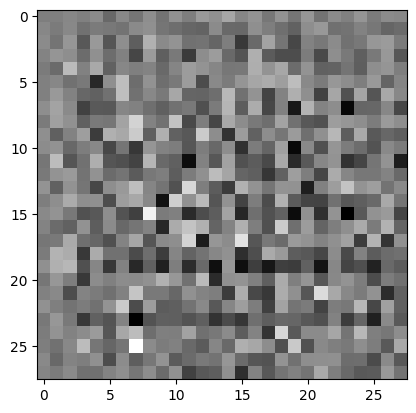

In [ ]:
#using the pretrained model
generator=make_generator_model()

noise=tf.random.normal([1,100])
generated_image=generator(noise,training=False)

plt.imshow(generated_image[0,:,:,0],cmap='gray')

Discriminator:purpose detect whether it is real or fake



In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
#using the untrained discriminator to predict whether an image is real or fake
discriminator=make_discriminator_model()
decision=discriminator(generated_image)
print(decision)

tf.Tensor([[-0.00068422]], shape=(1, 1), dtype=float32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss and Optimizer

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True) # Changed 'from_logit' to 'from_logits'


Discriminant loss:This method quantifies how well the discriminator is able to distinguish real images from fakes,it compares the discriminators predictions on the real images to an array of 1s,and the discriminators predictions on fake(generated)images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

**Generator loss**:It quantifies hiw well it was able to trick the discriminator.Intutivelyif the generator is performing well,the discriminator will classify the fake images as real.Here compare the discriminators decisions on the generated images to an array as 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimize are different since we will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

**saving the checkpoints**

In [ ]:
import os

In [ ]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,"ckpt")
checkpoint=tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                               discriminator_optimizer=discriminator_optimizer,
                               generator=generator,
                               discriminator=discriminator)

Defining the training loop

In [ ]:
EPOCHS=50
noise_dim=100
num_examples_to_generate=16

seed=tf.random.normal([num_examples_to_generate,noise_dim])

The training loop begins with generator receiving a random seed as input.That seed is used to produce an image.The discriminator is then used to classify real images .The loss is calculated for each of these models and the gradients are used to update the generator and discriminator

In [ ]:
@tf.function
def train_step(images):
    noise=tf.random.normal([BATCH_SIZE,noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images=generator(noise,training=True)

        real_output=discriminator(images,training=True)
        fake_output=discriminator(generated_images,training=True)

        gen_loss=generator_loss(fake_output)
        disc_loss=discriminator_loss(real_output,fake_output)

        gradients_of_generator=gen_tape.gradient(gen_loss,generator.trainable_variables)
        gradients_of_discriminator=disc_tape.gradient(disc_loss,discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))

In [ ]:
def train(dataset,epochs):
    for epoch in range(epochs):
        start=time.time()

        for image_batch in dataset:
            train_step(image_batch)

        display.clear_output(wait=True)
        generate_and_save_images(generator,epoch+1,seed)

        if(epoch+1)%15==0:
            checkpoint.save(file_prefix=checkpoint_prefix)
        print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))

    display.clear_output(wait=True)
    generate_and_save_images(generator,epochs,seed)

**Generate and save images**

In [ ]:
def generate_and_save_images(model,epoch,test_input):
    predictions=model(test_input,training=False)
    fig=plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(predictions[i,:,:,0]*127.5+127.5,cmap='gray')
        plt.axis('off')
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

**Training the model:**Call the train() method defined above totrain the generator and discriminator simultaneously.Note training GANs can be tricky its important that the generator and discriinator do not overpower each other(eg:train at a similar rate) At the begining of the training the generated images look like random noise.As training progresses the generated digits will look increasingly real.after about 50 epochs they resemble MINST digits.

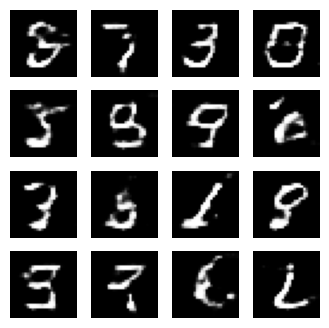

In [ ]:
train(train_dataset,EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
#display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

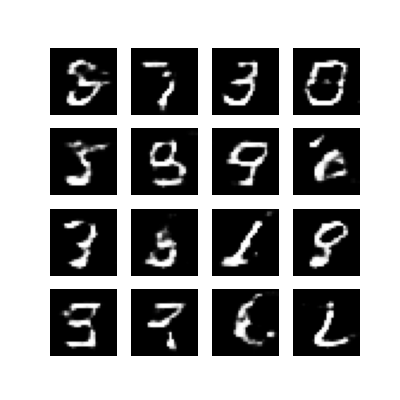

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file='dcgan.gif'

with imageio.get_writer(anim_file,mode='I') as writer:
    filenames=glob.glob('image*.png')
    filenames=sorted(filenames)
    for filename in filenames:
        image=imageio.imread(filename)
        writer.append_data(image)
    image=imageio.imread(filename)
    writer.append_data(image)

<ipython-input-31-6cce2936d4ae>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(filename)
<ipython-input-31-6cce2936d4ae>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(filename)



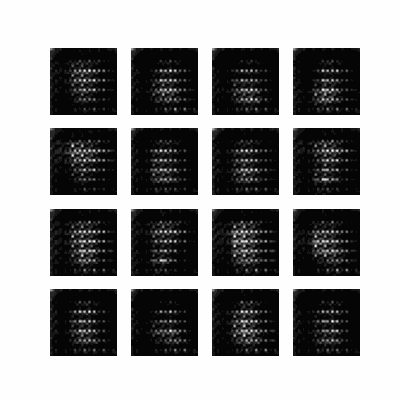

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)